# Homework 2: classification
Data source: http://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data
**Description:** The goal of this HW is to be familiar with the basic classifiers PML Ch 3.
For this HW, we continue to use Polish companies bankruptcy data Data Set from UCI Machine Learning Repository. Download the dataset and put the 4th year file (4year.arff) in your YOUR_GITHUB_ID/PHBS_MLF_2019/HW2/
I did a basic process of the data (loading to dataframe, creating bankruptcy column, changing column names, filling-in na values, training-vs-test split, standardizatino, etc). See my github。

# Preparation

## Load, read and clean

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

data = arff.loadarff('./data/4year.arff')
df = pd.DataFrame(data[0])
df['bankruptcy'] = (df['class']==b'1')
del df['class']
df.columns = ['X{0:02d}'.format(k) for k in range(1,65)] + ['bankruptcy']
df.describe()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,9791.000000,9791.000000,9791.000000,9749.000000,9.771000e+03,9791.000000,9791.000000,9773.000000,9792.000000,9791.000000,...,9.792000e+03,9771.000000,9791.000000,9776.000000,9791.000000,9178.000000,9760.000000,9.771000e+03,9749.000000,9561.000000
mean,0.043019,0.596404,0.130959,8.136600,6.465164e+01,-0.059273,0.059446,19.884016,1.882296,0.389040,...,7.686330e+03,-0.992263,0.035022,1.133287,0.856053,118.156064,25.194430,2.015157e+03,8.660813,35.949619
std,0.359321,4.587122,4.559074,290.647281,1.475939e+04,6.812754,0.533344,698.697015,17.674650,4.590299,...,7.605261e+04,77.007971,8.945365,8.038201,26.393305,3230.316692,1099.260821,1.171461e+05,60.838202,483.318623
min,-12.458000,0.000000,-445.910000,-0.045319,-3.794600e+05,-486.820000,-12.458000,-1.848200,-0.032371,-445.910000,...,-7.132200e+05,-7522.100000,-597.420000,-30.892000,-284.380000,0.000000,-12.656000,-1.496500e+04,-0.024390,-0.000015
25%,0.001321,0.263145,0.020377,1.047000,-5.121700e+01,-0.000578,0.003004,0.428300,1.006675,0.294440,...,2.184000e+01,0.003121,0.008768,0.885722,0.000000,5.356325,4.267700,4.323400e+01,2.938800,2.012900
50%,0.041364,0.467740,0.199290,1.591800,-5.557600e-02,0.000000,0.048820,1.088700,1.161300,0.510450,...,9.503300e+02,0.043679,0.098026,0.958305,0.002129,9.482000,6.283550,7.472900e+01,4.848900,4.041600
75%,0.111130,0.689255,0.410670,2.880400,5.573200e+01,0.065322,0.126940,2.691000,1.970225,0.714290,...,4.694550e+03,0.117170,0.242680,0.996163,0.211790,19.506000,9.938200,1.233450e+02,8.363800,9.413500
max,20.482000,446.910000,22.769000,27146.000000,1.034100e+06,322.200000,38.618000,53209.000000,1704.800000,12.602000,...,6.123700e+06,112.020000,226.760000,668.750000,1661.000000,251570.000000,108000.000000,1.077900e+07,5662.400000,21153.000000


In [2]:
sum(df.bankruptcy == True)

515

In [3]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp_mean.fit_transform(df.values)


*A dll load error occured here. Solution recorded in [my blog](https://quoth.win/671.html)*

In [4]:
from sklearn.model_selection import train_test_split

X, y = X_imp[:, :-1], X_imp[:, -1]
X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [5]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## 1. Find the 2 most important features
Select the 2 most important features using LogisticRegression with L1 penalty. **(Adjust C until you see 2 features)**

In [6]:
from sklearn.linear_model import LogisticRegression

C = [1, .1, .01, 0.001]
cdf = pd.DataFrame()

for c in C:
    lr = LogisticRegression(penalty='l1', C=c, solver='liblinear',  random_state=0)
    lr.fit(X_train_std, y_train)
    print(f'[C={c}] with {lr.coef_[lr.coef_!=0].shape[0]} features: \n {lr.coef_[lr.coef_!=0]} \n') # Python >= 3.7
    if lr.coef_[lr.coef_!=0].shape[0] == 2:
        cdf = pd.DataFrame(lr.coef_.T , df.columns[:-1], columns=['coef'])

[C=1] with 41 features: 
 [-0.21124721 -0.32721186 -0.027786   -1.13272997 -0.06357798  2.33195848
 -1.15522622 -0.00657024 -0.04684187 -1.08683927  0.1425248   0.01096755
 -0.01922072 -0.01383184 -0.01411706 -0.10736095  0.00238513  0.24577125
 -0.85510327  0.85209928 -0.30366778 -0.30474956 -0.0296142  -0.01749839
 -0.04401046 -0.03613927  0.12211322 -0.0138838  -0.45429792  1.3157471
 -0.4035633  -0.46000256  0.04269182 -0.13000407 -0.0474417  -0.11325886
 -0.12953285 -0.56454917  0.00689488 -0.4300807  -0.08949632] 

[C=0.1] with 14 features: 
 [-0.07260191 -0.00523502 -0.05866954 -0.1005855  -0.62441034 -0.04143727
 -0.07701467 -0.00230242  0.01202513  0.01090586  0.28007452 -0.10726656
 -0.04314757 -0.00208574] 

[C=0.01] with 2 features: 
 [-0.00174613 -0.05571114] 

[C=0.001] with 0 features: 
 [] 



In [7]:
lr = LogisticRegression(penalty='l1', C=0.01, solver='liblinear',  random_state=0) # complete
lr.fit(X_train_std, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
cdf = cdf[cdf.coef != 0]
cdf

,coef
X01,-0.001746
X38,-0.055711


### redefine X_train_std and X_test_std

In [9]:
X_train_std = X_train_std[:, lr.coef_[0]!=0]
X_test_std = X_test_std[:, lr.coef_[0]!=0]

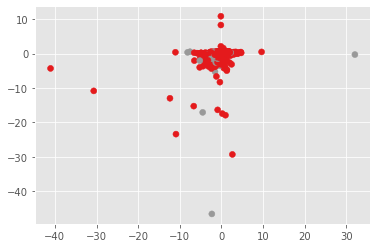

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.scatter(x=X_train_std[:,0], y=X_train_std[:,1], c=y_train, cmap='Set1')

## 2. Apply LR / SVM / Decision Tree below
Using the 2 selected features, apply LR / SVM / decision tree. **Try your own hyperparameters (C, gamma, tree depth, etc)** to maximize the prediction accuracy. (Just try several values. You don't need to show your answer is the maximum.)

## LR

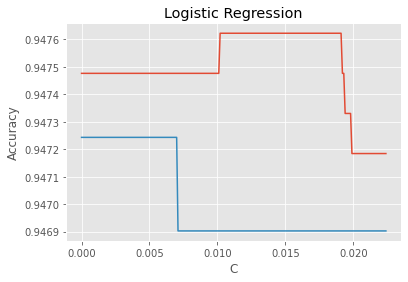

In [11]:
CLr = np.arange(0.000000000000001, 0.0225, 0.0001)
acrcLr = [] # acurracy
for c in CLr:
    lr = LogisticRegression(C=c,penalty='l1',solver='liblinear')
    lr.fit(X_train_std, y_train)
    acrcLr.append([lr.score(X_train_std, y_train), lr.score(X_test_std, y_test), c])
acrcLr = np.array(acrcLr)
plt.plot(acrcLr[:,2], acrcLr[:,0])
plt.plot(acrcLr[:,2], acrcLr[:,1])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Logistic Regression')
plt.show()

Choose `c=.01`

In [12]:
c = .01
lr = LogisticRegression(C=c,penalty='l1',solver='liblinear')
lr.fit(X_train_std, y_train)
print(f'Accuracy when [c={c}] \nTrain {lr.score(X_train_std, y_train)}\nTest  {lr.score(X_test_std, y_test)}')

Accuracy when [c=0.01] 
Train 0.9474759264662971
Test  0.9469026548672567


## SVM

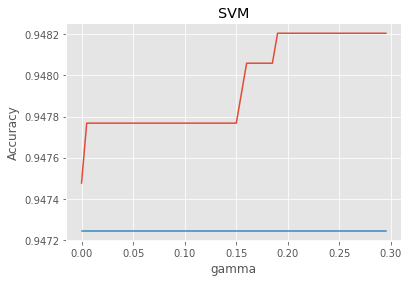

In [13]:
from sklearn.svm import SVC
G = np.arange(0.00001, 0.3, 0.005)
acrcSvm = []
for g in G:
    svm = SVC(kernel='rbf', gamma=g, C=1.0, random_state=0)
    svm.fit(X_train_std, y_train)
    acrcSvm.append([svm.score(X_train_std, y_train), svm.score(X_test_std, y_test), g])
acrcSvm = np.array(acrcSvm)
plt.plot(acrcSvm[:,2], acrcSvm[:,0])
plt.plot(acrcSvm[:,2], acrcSvm[:,1])
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.title('SVM')
plt.show()

Choose `gamma = 0.2`

In [14]:
g = 0.2
svm = SVC(kernel='rbf', gamma=g, C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
print(f'Accuracy when [gamma={g}] \nTrain {svm.score(X_train_std, y_train)}\nTest  {svm.score(X_test_std, y_test)}')

Accuracy when [gamma=0.2] 
Train 0.9482054274875985
Test  0.9472430224642614


## Decision Tree

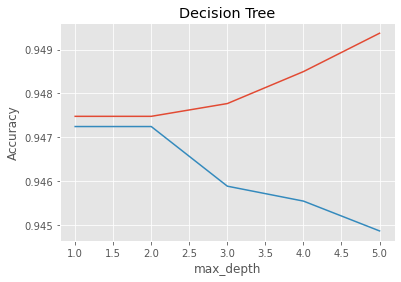

In [15]:
from sklearn.tree import DecisionTreeClassifier
depthTree = range(1, 6)
acrcTree = []
for depth in depthTree:
    tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
    tree.fit(X_train_std, y_train)
    acrcTree.append([tree.score(X_train_std, y_train), tree.score(X_test_std, y_test), depth])
acrcTree = np.array(acrcTree)
plt.plot(acrcTree[:,2], acrcTree[:,0])
plt.plot(acrcTree[:,2], acrcTree[:,1])
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree')
plt.show()

Choose `max_depth=2`:

In [16]:
depth = 2
tree = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=0)
tree.fit(X_train_std, y_train)
print(f'Accuracy when [max_depth={depth}] \nTrain {tree.score(X_train_std, y_train)}\nTest  {tree.score(X_test_std, y_test)}')

Accuracy when [max_depth=2] 
Train 0.9474759264662971
Test  0.9472430224642614


## 3. Visualize the classification
Visualize your classifiers using the plot_decision_regions function from PML Ch. 3

In [17]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [18]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

## LR
`test_idx` removed on purpose

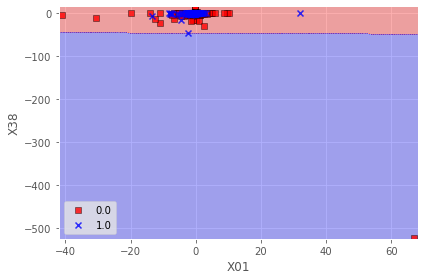

In [19]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr)
plt.xlabel(cdf.index[0])
plt.ylabel(cdf.index[1])
plt.legend(loc='lower left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

## Decision Tree

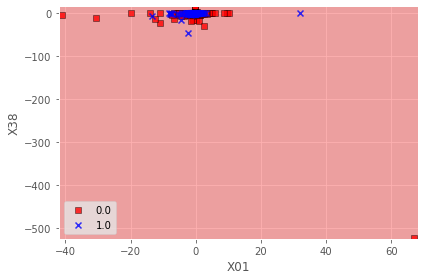

In [20]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=tree)
plt.xlabel(cdf.index[0])
plt.ylabel(cdf.index[1])
plt.legend(loc='lower left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

## SVM (samples)

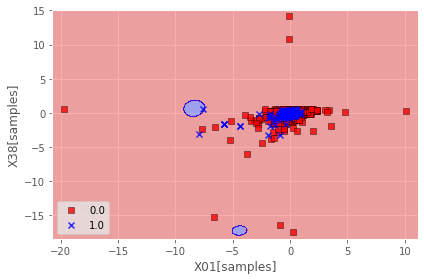

In [22]:
# Visualization of all features in a SVM model is too slow
# Because the complexity is very high (sourse:https://scikit-learn.org/stable/modules/svm.html#complexity)
# So use random samples(n=3000) instead

samples = np.random.randint(0, len(X_combined_std), size=3000)
plot_decision_regions(X=X_combined_std[samples], y=y_combined[samples],
                      classifier=svm)
plt.xlabel(cdf.index[0] + '[samples]')
plt.ylabel(cdf.index[1] + '[samples]')
plt.legend(loc='lower left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()